In [1]:
# POde pular essa etapa se os pacotes já estão instalados
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install librosa
!pip install tqdm
!pip install matplotlib
!pip install tensorflow

In [2]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed, Conv2D, MaxPooling2D

#to play audio
import IPython.display as ipd

# Nesse caso você precisa ter no seu diretório uma pasta com o mesmo nome da variável base_dir
base_dir = "audioset"
# E dentro da pasta audioset, você precisa de 3 pastas: carros, motocicletas e motosserras contendo os áudios
audio_carro_path = base_dir + "/carros/"
audio_moto_path = base_dir + "/motocicletas/"  # caminho onde estão os arquivos de audio
audio_serra_path = base_dir + "/motosserras_grennbug/"

spec_base_path = "./audioset/mel_espectrogramas_com_log_8000Hz_gb"
spec_carro_path = os.path.join(spec_base_path, "carros_gb")
spec_moto_path = os.path.join(spec_base_path, "motocicletas_gb")
spec_serra_path = os.path.join(spec_base_path, "motosserras_gb")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

In [3]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:65]
print(f"Número de arquivos .wav na pasta {audio_carro_path}= ",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:65]
print(f"Número de arquivos .wav na pasta {audio_moto_path}= ",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:65]
print(f"Número de arquivos .wav na pasta {audio_serra_path}= ",len(audio_serra_clips))

Número de arquivos .wav na pasta audioset/carros/=  65
Número de arquivos .wav na pasta audioset/motocicletas/=  65
Número de arquivos .wav na pasta audioset/motosserras_grennbug/=  65


In [4]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(audio_carro_path+audio_carro_clips[0]) 
x_moto, sr_moto = librosa.load(audio_moto_path+audio_moto_clips[4]) 
x_serra, sr_serra = librosa.load(audio_serra_path+audio_serra_clips[6]) 

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050
<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050
<class 'numpy.ndarray'> <class 'int'>
(1323000,) 22050


In [5]:
#converter o audio para espectrograma:
# é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def salvar_espectrograma(y, sr, spec_path, log=False):

    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096)
    mel_spect = librosa.power_to_db(spect, ref=np.max)

    plt.figure(figsize=(1, 1))

    if log:
        librosa.display.specshow(mel_spect, x_axis='time', y_axis='log', fmax=8000)
    else: librosa.display.specshow(mel_spect, x_axis='time', y_axis='mel', fmax=8000)
    plt.margins(0,0)
    
    plt.axis("off")
    plt.savefig(spec_path, dpi=300, bbox_inches = 'tight',
                pad_inches = 0, transparent=False, facecolor='white')
    plt.close()

    print(f"{spec_path} salvo com sucesso.")

# Salvar imagens de espectrograma
 - Pule esse passo se as imagens já estiverem na pasta

./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\#5) Project ForkenSwift electric car： shifting gears-Liqv3KgXThk.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\$150 car jump-1aCyNnYNWvA.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\'87 Honda Mugen Motul Civic Si Race Car at Costa Di Almafi GT4-28SbkfcA6kE.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\'０７ STREET CAR SHOW  ＃６ 大黒２--NBRp5qsrYQ.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\(16) Car Cam： 2 mobile speed cameras, speed racer & scenic esplanade route-2JAjo7yVCgs.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\(HD) - Forza 4 - Top Gear - Car Test - 1967 Chevrolet Corvette Stingray 427--v2FkuCVLjo.png salvo com sucesso.
./audioset/mel_espectrogramas_com_log_8000Hz_gb\carros_gb\(HD) - Forza 4 - Top Gear - Car Test - 1980 Lotus Esprit Turbo-1Z3ciuA3Y3o.

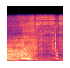

In [6]:
# Salvar espectrogramas de carros
for audio_name in audio_carro_clips:
    x_carro, sr_carro = librosa.load(audio_carro_path + audio_name) 
    audio_name = audio_name.replace(".mp3", ".png")
    spec_path = os.path.join(spec_carro_path, audio_name)
    try:
        salvar_espectrograma(x_carro, sr_carro, spec_path)
    except:
        print("Erro ao salvar arquivo %s" % spec_path)

# Salvar espectrogramas de motos
for audio_name in audio_moto_clips:
    x_moto, sr_moto = librosa.load(audio_moto_path + audio_name) 
    audio_name = audio_name.replace(".mp3", ".png")
    spec_path = os.path.join(spec_moto_path, audio_name)
    try:
        salvar_espectrograma(x_moto, sr_moto, spec_path)
    except:
        print("Erro ao salvar arquivo %s" % spec_path)

# Salvar espectrogramas de motosserras
for audio_name in audio_serra_clips:
    x_serra, sr_serra = librosa.load(audio_serra_path + audio_name) 
    audio_name = audio_name.replace(".wav", ".png")
    spec_path = os.path.join(spec_serra_path, audio_name)
    try:
        salvar_espectrograma(x_serra, sr_serra, spec_path)
    except Exception as e:
        print( "Erro ao salvar arquivo: %s." % e )

# Treinamento e teste de rede neural

In [7]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

lista_imagens = []
labels = []

def adicionar_rotulos_imagens(espectrogramas, espectro_path, label):
    for spec in espectrogramas:
        image_path = os.path.join(espectro_path, spec)     
        img = io.imread(image_path)
        lista_imagens.append(img[:, :, :-1])
        # 0 corresponde aos carros e motos
        labels.append(label)

adicionar_rotulos_imagens(espectrogramas_carro, spec_carro_path, 0)
adicionar_rotulos_imagens(espectrogramas_moto, spec_moto_path, 0)
adicionar_rotulos_imagens(espectrogramas_serra, spec_serra_path, 1)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(lista_imagens), np.array(labels), test_size=0.2, random_state=100
)

In [13]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics='accuracy')
model.fit(X_train, y_train, batch_size=32 , epochs=15)

y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

Epoch 1/15
5/5 [==============================] - 5s 651ms/step - loss: 154.7866 - accuracy: 0.4645
Epoch 2/15
5/5 [==============================] - 3s 580ms/step - loss: 1.3532 - accuracy: 0.7032
Epoch 3/15
5/5 [==============================] - 3s 635ms/step - loss: 0.2553 - accuracy: 0.8710
Epoch 4/15
5/5 [==============================] - 3s 637ms/step - loss: 0.2837 - accuracy: 0.8387
Epoch 5/15
5/5 [==============================] - 3s 625ms/step - loss: 0.5651 - accuracy: 0.8194
Epoch 6/15
5/5 [==============================] - 3s 627ms/step - loss: 0.3834 - accuracy: 0.8452
Epoch 7/15
5/5 [==============================] - 3s 643ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 8/15
5/5 [==============================] - 4s 706ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 9/15
5/5 [==============================] - 3s 679ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 10/15
5/5 [==============================] - 3s 673ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 11/15
5/5 [